# Brain Hemorrhage Identification

Conectarea la Google Drive pentru a prelua datele de acolo

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import numpy as np
import tensorflow as tf

Citirea datelor (imaginilor si etichetelor pentru setul de antrenare). 
Schimbarea dimensiunii vectorului de etichete

In [0]:
from keras.utils import to_categorical

images_path = "/content/drive/My Drive/DL/data/data/{}.png"
train_labels_path = "/content/drive/My Drive/DL/train_labels.txt"

train_data = open(train_labels_path)
train_data.readline()

features = []
labels = []

for dt in train_data:
  dt = dt[:-1].split(",")
  id = dt[0]
  label = int(dt[1])
  labels.append(label)
  img = cv2.imread(images_path.format(id))
  features.append(img)

features = np.array(features, dtype = np.float32)
labels = np.array(labels, dtype = np.float32)

labels = to_categorical(labels)

print("Gata")

Gata


Arhitectura modelului si optimizatorul. Antrenarea modelului

In [0]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(128, (7, 7), activation = 'relu', input_shape = tuple(features.shape[1:])))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, (6, 6), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(16, (4, 4), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

adam = Adam(lr = 1e-5)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

fit = model.fit(features, labels, epochs = 15, batch_size = 64)















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
17000/17000 [==============================] - 69s 4ms/step - loss: 0.3744 - acc: 0.8529
Epoch 2/15
17000/17000 [==============================] - 60s 4ms/step - loss: 0.3169 - acc: 0.8668
Epoch 3/15
17000/17000 [==============================] - 60s 4ms/step - loss: 0.2858 - acc: 0.8771
Epoch 4/15
17000/17000 [==============================] - 60s 4ms/step - loss: 0.2594 - acc: 0.8899
Epoch 5/15
17000/17000 [==============================] - 59s 3ms/step - loss: 0.2370 - acc: 0.9025
Epoch 6/15
17000/17000 [==============================] - 59s 3ms/step - loss: 0.2096 - acc: 0.9173
Epoch 7/15
17000/17000 [==============================] - 59s 3ms/step - loss: 0.1864 - acc: 0.9290
Epoch 8/15
17000/17000 [==============================] - 59s 3ms/step - loss: 0.1615 - acc: 0.9428
Epoch 9/15
17000/17000 [==============================] - 59s 3ms/step - loss: 0.1373 - ac

Prezicerea etichetelor pentru imaginile din setul de test (5.149 imagini: de la 17.001 pana la 22.149) si scrierea lor in fisier

In [0]:
f = open("submissions.txt", "w")

f.write("id,class\n")

for i in range(17001, 22150):
  id = "0" + str(i)
  img_pred = cv2.imread(images_path.format(id))
  pred = model.predict(np.array([img_pred], dtype = np.float32)) 
  pred = pred[0]
  if pred[0] > pred[1]:
    pred = 0
  else:
    pred = 1
  f.write(str(id) + "," + str(pred) +"\n")

f.close()

### 3-Fold Cross Validation cu confusion matrix

Citirea datelor (la fel ca mai sus)

In [0]:
from keras.utils import to_categorical

images_path = "/content/drive/My Drive/DL/data/data/{}.png"
train_labels_path = "/content/drive/My Drive/DL/train_labels.txt"

train_data = open(train_labels_path)
train_data.readline()

features = []
labels = []

for dt in train_data:
  dt = dt[:-1].split(",")
  id = dt[0]
  label = int(dt[1])
  labels.append(label)
  img = cv2.imread(images_path.format(id))
  features.append(img)

features = np.array(features, dtype = np.float32)
labels = np.array(labels, dtype = np.float32)

labels = to_categorical(labels)

print("Gata")

Gata


Arhitectura modelului si optimizatorul (la fel ca mai sus)

In [0]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD

def create_model(data_shape):
  K.clear_session()
  model = Sequential()

  model.add(Conv2D(128, (7, 7), activation = 'relu', input_shape = data_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(64, (6, 6), activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(32, (5, 5), activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(16, (4, 4), activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Flatten())
  model.add(Dense(1024, activation = 'relu'))
  model.add(Dense(512, activation = 'relu'))
  model.add(Dense(256, activation = 'relu'))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(2, activation = 'softmax'))

  adam = Adam(lr = 1e-5)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

  return model

Impartirea setului de date random in 3, crearea si antrenarea modelului pe fiecare din parti, calcularea pierderii si acuratetii si crearea matricei de confuzie

Epoch 1/15
11333/11333 [==============================] - 41s 4ms/step - loss: 0.4095 - acc: 0.8422
Epoch 2/15
11333/11333 [==============================] - 40s 3ms/step - loss: 0.3308 - acc: 0.8601
Epoch 3/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.2946 - acc: 0.8710
Epoch 4/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.2647 - acc: 0.8858
Epoch 5/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.2387 - acc: 0.8987
Epoch 6/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.2182 - acc: 0.9087
Epoch 7/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.1923 - acc: 0.9235
Epoch 8/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.1696 - acc: 0.9366
Epoch 9/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.1448 - acc: 0.9509
Epoch 10/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.1271 - acc: 0.9605

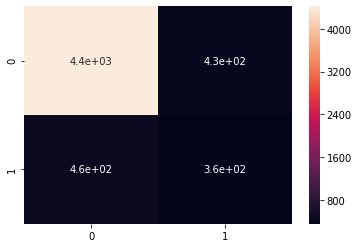

Epoch 1/15
11333/11333 [==============================] - 40s 4ms/step - loss: 0.4807 - acc: 0.7999
Epoch 2/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.3435 - acc: 0.8593
Epoch 3/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.3064 - acc: 0.8717
Epoch 4/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.2777 - acc: 0.8830
Epoch 5/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.2522 - acc: 0.8961
Epoch 6/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.2260 - acc: 0.9096
Epoch 7/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.2019 - acc: 0.9231
Epoch 8/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.1794 - acc: 0.9337
Epoch 9/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.1569 - acc: 0.9449
Epoch 10/15
11333/11333 [==============================] - 39s 3ms/step - loss: 0.1310 - acc: 0.9585

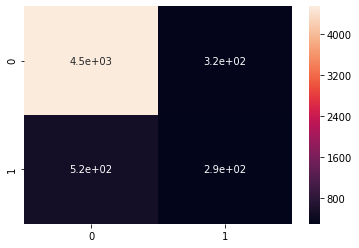

Epoch 1/15
11334/11334 [==============================] - 40s 4ms/step - loss: 0.3834 - acc: 0.8561
Epoch 2/15
11334/11334 [==============================] - 39s 3ms/step - loss: 0.3206 - acc: 0.8644
Epoch 3/15
11334/11334 [==============================] - 39s 3ms/step - loss: 0.2883 - acc: 0.8758
Epoch 4/15
11334/11334 [==============================] - 39s 3ms/step - loss: 0.2624 - acc: 0.8874
Epoch 5/15
11334/11334 [==============================] - 39s 3ms/step - loss: 0.2368 - acc: 0.9012
Epoch 6/15
11334/11334 [==============================] - 39s 3ms/step - loss: 0.2115 - acc: 0.9139
Epoch 7/15
11334/11334 [==============================] - 39s 3ms/step - loss: 0.1895 - acc: 0.9261
Epoch 8/15
11334/11334 [==============================] - 39s 3ms/step - loss: 0.1692 - acc: 0.9386
Epoch 9/15
11334/11334 [==============================] - 39s 3ms/step - loss: 0.1483 - acc: 0.9472
Epoch 10/15
11334/11334 [==============================] - 39s 3ms/step - loss: 0.1253 - acc: 0.9623

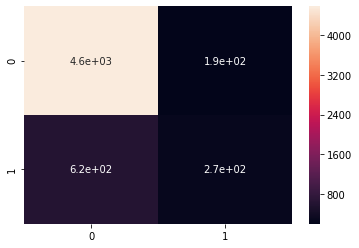

[[0.4300842189601601, 0.8424210340568202], [0.4375139688696625, 0.8533615669719079], [0.45254167503070125, 0.8572184962936816]]


In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

loss_acc = []

kf = KFold(n_splits =3, random_state=None, shuffle=True)
kf.get_n_splits(features)

for train_index, test_index in kf.split(features):
  model = create_model(tuple(features.shape[1:]))
  fit = model.fit(features[train_index], labels[train_index], epochs = 15, batch_size = 64)
  ev = model.evaluate(features[test_index], labels[test_index])
  loss_acc.append(ev)
  
  y_pred = model.predict(features[test_index])

  y_pred = np.argmax(y_pred, axis=1)
  y_exp = np.argmax(labels[test_index], axis=1)

  cm = confusion_matrix(y_exp, y_pred)
  
  sn.heatmap(cm, annot=True)
  plt.show()

print(loss_acc)